In this project, I analyze data from earthquakes took place in Greece in a time span of 118 years

All the data are from this Kaggle [dataset](https://www.kaggle.com/astefopoulos/earthquakes-in-greece-19012018)

In [29]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()    
%matplotlib inline

In [30]:
# LOAD THE DATA
data = pd.read_csv('EarthQuakes in Greece.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256655 entries, 0 to 256654
Data columns (total 8 columns):
Year                   256655 non-null int64
Month                  256655 non-null int64
Date                   256655 non-null int64
Hours                  256655 non-null int64
Minutes                256655 non-null int64
LATATITUDE (N)         256655 non-null float64
LONGITUDE  (E)         256655 non-null float64
MAGNITUDE (Richter)    256655 non-null float64
dtypes: float64(3), int64(5)
memory usage: 15.7 MB


No missing values and seems that all data types are as suppose to be: numerical values

What is very interesting is that we have three columns to show the date each earthquake took place. One for the year, one for the month and one for the day. A good idea is to make one column out of these three columns.

In [32]:
data.describe()

,Year,Month,Date,Hours,Minutes,LATATITUDE (N),LONGITUDE (E),MAGNITUDE (Richter)
count,256655.000000,256655.000000,256655.000000,256655.00000,256655.000000,256655.000000,256655.000000,256655.000000
mean,2008.040264,6.407777,15.808735,11.63899,29.427940,37.963254,22.916142,2.418947
std,10.802470,3.396046,8.713267,7.40049,17.290899,1.544382,2.060996,0.887958
min,1901.000000,1.000000,1.000000,0.00000,0.000000,33.100000,14.810000,0.000000
25%,2007.000000,3.000000,8.000000,5.00000,14.000000,37.180000,21.490000,1.700000
50%,2012.000000,6.000000,16.000000,12.00000,29.000000,38.240000,22.320000,2.400000
75%,2014.000000,9.000000,23.000000,18.00000,44.000000,38.770000,23.980000,3.100000
max,2018.000000,12.000000,31.000000,23.00000,59.000000,43.680000,35.030000,8.000000


We have a time span from 1901 to 2018 this is about 118 year of earthquakes, that will be interesting. The month entries are ok (1 - 12) as the day entries (1 - 31), hour and minutes seem to be ok too. The deviation from the LAT and LON seem to be very small, that means that the earthquakes took place around the same region, but that can we prove it later. The magnitude of the earthquakes has a min of 0, that seems not ok as an earthquake of 0 doesn't exist. But the max is 8 Richter, that is quite a shake.

A quick look online I found that only one earthquake took place in Greece and was so big - 8 Richter and was around 11 August 1903 near the Island of Kythira, that can we proof now.

In [33]:
data[data['MAGNITUDE (Richter)'] == 8]

,Year,Month,Date,Hours,Minutes,LATATITUDE (N),LONGITUDE (E),MAGNITUDE (Richter)
11,1903,8,11,4,32,36.3,23.0,8.0


Great we proof that we have only one so big earthquake and seem to be right, so our dataset is valid.

In [34]:
data.head()

,Year,Month,Date,Hours,Minutes,LATATITUDE (N),LONGITUDE (E),MAGNITUDE (Richter)
0,1901,9,12,6,15,39.0,22.2,5.6
1,1901,10,25,16,18,37.0,22.2,5.4
2,1901,12,24,23,18,37.2,22.2,5.8
3,1902,4,11,18,35,38.5,23.5,5.8
4,1902,7,5,14,56,40.8,23.2,6.6


This is the head of our data, at first look what can we fix is the names, the long and all caps names can be changed with simpler and easier to type names.

In [35]:
columns = ['year', 'month', 'day', 'hours', 'minutes', 'LAT', 'LON', 'richter']

data.columns = columns

data['date'] = pd.to_datetime(data[['year','month','day','hours','minutes']])

data.drop(['year', 'month', 'day', 'hours', 'minutes'], axis=1, inplace=True)

In [36]:
data.head()

,LAT,LON,richter,date
0,39.0,22.2,5.6,1901-09-12 06:15:00
1,37.0,22.2,5.4,1901-10-25 16:18:00
2,37.2,22.2,5.8,1901-12-24 23:18:00
3,38.5,23.5,5.8,1902-04-11 18:35:00
4,40.8,23.2,6.6,1902-07-05 14:56:00


Very good, our dataset is all tied up, we have a nice column with the complete date, a simple column for the magnitude and for the GEO locations we have simpler names, we can type quicker and with no mistakes.

Before we go any further let's see what each Richter value means:
<img src="https://upload.wikimedia.org/wikipedia/commons/d/de/Earthquake_severity.jpg"/>

source:https://en.wikipedia.org/wiki/Richter_magnitude_scale

In [37]:
# PLOTS & EDA

Now, let's make some data analysis, we can dive deeper into our data to see what is really going on.

We have 118 years of records but, do we have an equal amount of data for each year?

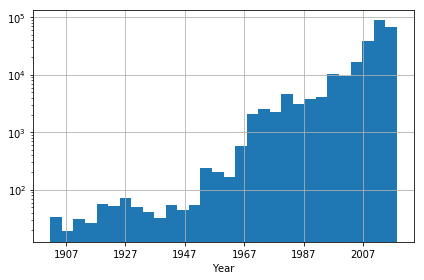

In [38]:
data['date'].hist(bins=30)
plt.yscale('log')
plt.xlabel('Year')
plt.tight_layout()

It seems no, as we can see we have more records late at 90's than early at 90's. That is normal I think as at these years there were no right foundations ot the needed equipment for this job.

But this will be no problem for our analysis.

Now lets see how the magnitude is distibuted

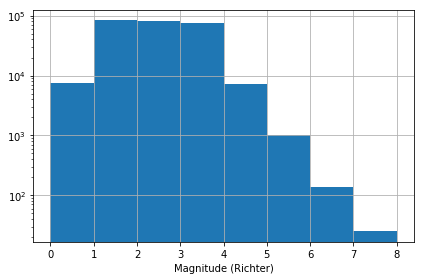

In [11]:
data['richter'].hist(bins=8)
plt.yscale('log')
plt.xlabel('Magnitude (Richter)')
plt.tight_layout()

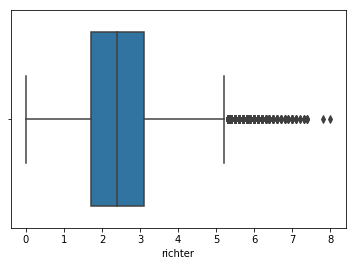

In [12]:
sns.boxplot(x='richter', data=data, )

Nice, the magnitude feature is well distributed, we have a mid-range of earthquakes with max around 8 as we saw earlier a min of 0. Now, this 0 Richter earthquake we have to invest further.

In [13]:
data[data['richter'] == 0]

,LAT,LON,richter,date
101800,37.86,23.09,0.0,2010-09-29 02:09:00
214006,38.38,21.94,0.0,2015-07-25 01:26:00


Ok, its only two entries, we can live with that, or we can drop them. That's up to the scope of the analysis. At the moment I will let them inside. The important thing is to know that there are exist.Ok, its only two entries, we can live with that, or we can drop them. That's up to the scope of the analysis. At the moment I will them inside. The important think is to know that there are there.

Now let's try to look at how strong the earthquakes are in the pass of years. We do this with a heatmap but first, we have to create a pivot table

In [14]:
year = data['date'].apply(lambda x: x.year) #we separate the year from the date
month = data['date'].apply(lambda x: x.month) #we separate the month from the date
hour = data['date'].apply(lambda x: x.hour) #we separate the hours from the date

pivot_year = pd.pivot_table(data, values='richter', index=year)#we group the data for each year in a pivot table
pivot_month = pd.pivot_table(data, values='richter', index=month)#we group the data for each month in a pivot table
pivot_hour = pd.pivot_table(data, values='richter', index=hour)#we group the data for each hour in a pivot table

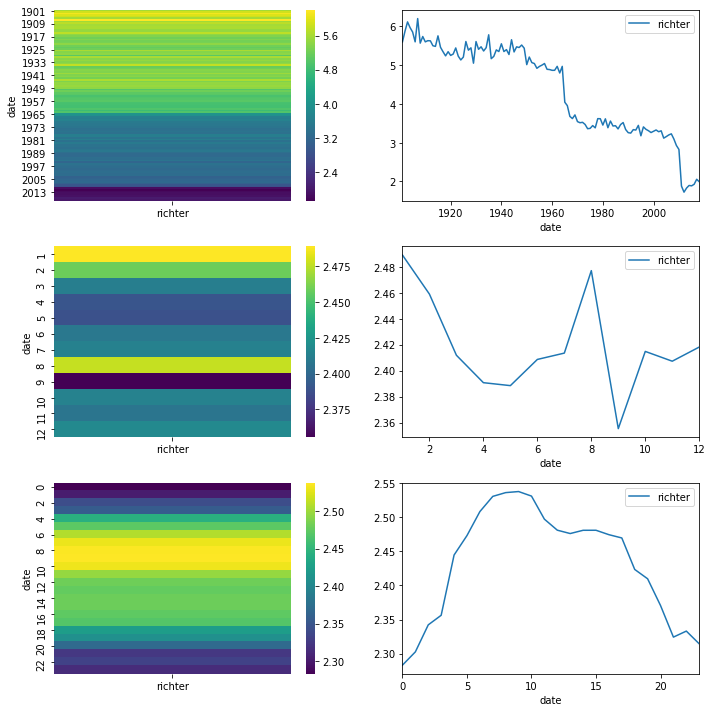

In [15]:
f, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.heatmap(pivot_year,yticklabels='auto', cmap='viridis', ax=axes[0][0])
sns.heatmap(pivot_month,yticklabels='auto', cmap='viridis', ax=axes[1][0])
sns.heatmap(pivot_hour,yticklabels='auto', cmap='viridis', ax=axes[2][0])

pivot_year.plot(ax=axes[0][1])
pivot_month.plot(ax=axes[1][1])
pivot_hour.plot(ax=axes[2][1])


plt.tight_layout()


Very nice, we see that as years go by we have weaker earthquakes, BUT this is not the case now, we noticed earlier that we have a smaller amount of records for the early '90s perhaps the people back then recorded only the strongest earthquakes and that's why we see this strange effect.

As consider the months the strongest seem to take place around January and February while the weakest around September, otherwise the rest months are equally distributed so no pattern here.

The hours are kind of interesting as we can see, late in the night we have the weakest earthquakes and about between 6 - 10 am the strongest.

Now its time to see the GEO features

Sometimes making a scatter plot of the features we can see the shape of a location, county, city, etc. Let's try it now to see what happens

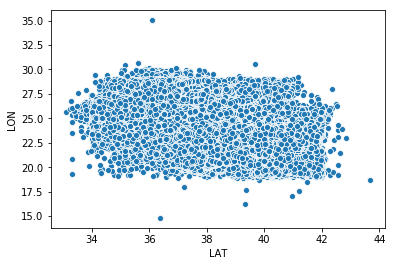

In [16]:
sns.scatterplot(x='LAT', y='LON', data=data)

With little further investigation online we find from this [source](http://geodata.gov.gr/en/dataset/periphereies-elladas) the physical boundaries of Greece. Now we can draw these border lines in the plot to have a picture of the earthquakes took place only in Greece 

South Bound Latitude: 33.957559

North Bound Latitude: 44.108926

West Bound Longitude: 18.17496

East Bound Longitude: 32.061679

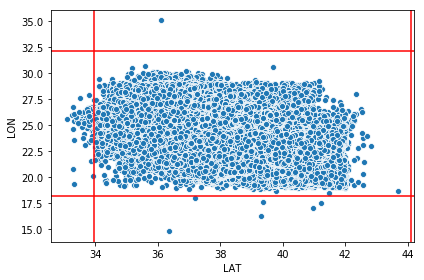

In [46]:
sns.scatterplot(x='LAT', y='LON', data=data)
plt.axvline(33.957559, color='r')
plt.axvline(44.108926, color='r')
plt.axhline(18.17496, color='r')
plt.axhline(32.061679,color='r')
plt.tight_layout()


We see that some of the data are not located in Greece but there are only a few compares to the whole dataset.

Now, we will use Folium an open source library which helps us plot maps

In [47]:
import folium

In [86]:
m = folium.Map([data['LAT'].mean(), data['LON'].mean()],zoom_start=6)
m

Ok, now we see the map of Greece and more specifically the mean area where the earthquakes took place. Now if we try to plot each entry we will end up to a high computational process and it would be unnecessary, so let's plot only the earthquakes that are bigger or equal 7 Richters. If we make a search in Wikipedia we will see that an earthquake with a magnitude bigger than 6 Richters described as "strong". So we decide to plot only the "strong" quakes.

In [106]:
def make_map(clm):
    lat = clm['LAT']
    lon = clm['LON']
    mag = clm['richter']
    year = clm['date'].year


    folium.Circle(
        radius=2000 * mag,
        location=[lat, lon],
        popup="Year: " + str(year) +" " + "Magnitude: " + " " +str(mag) + " richter",
        color='crimson',
        fill=False,
    ).add_to(m)


In [111]:
filter_richter = data['richter'] >= 7
filtered_data = data[filter_richter]

m = folium.Map([data['LAT'].mean(), data['LON'].mean()], zoom_start=6)
_ = filtered_data.apply(lambda x:make_map(x), axis=1)

m